In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from scipy.stats import f
import math
import pandas as pd
from tabulate import tabulate

In [2]:
loan=pd.read_csv('C:\\Users\\Koustav\\Downloads\\data (2).csv')

In [3]:
df=loan

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [5]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [7]:
df.shape

(100000, 24)

In [8]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [9]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 43:       # nunique:  returns unique values in the column,
                                                    #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))
#separating numerical and categorical data

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [10]:
df['AMT_GOODS_PRICE'].isnull().sum()

81

In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [28]:
#Doing the required data imputations

In [15]:
a=df['AMT_GOODS_PRICE'].mean()
a

538345.1489706662

In [16]:
df["AMT_GOODS_PRICE"].fillna(a, inplace = True, axis = 0)

In [18]:
info_of_cat('AMT_GOODS_PRICE') 

Unique values in AMT_GOODS_PRICE are: [ 351000.         1129500.          135000.          297000.
  513000.          454500.         1395000.         1530000.
  913500.          405000.          652500.           67500.
  697500.          679500.          247500.          387000.
  270000.          157500.          427500.          927000.
  450000.          225000.          702000.          675000.
  180000.          477000.          360000.         1125000.
  553500.          540000.          855000.          238500.
  598500.          252000.         1350000.          666000.
  202500.          517500.         1588500.         1080000.
  810000.           90000.          315000.          900000.
 1035000.          463500.          459000.          256500.
  585000.          643500.          283500.          472500.
  337500.          720000.          396000.           45000.
 1089000.          319500.         1435500.          688500.
  261000.          468000.          535500.    

In [22]:
info_of_cat('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405

There are null values in the NAME_TYPE_SUITE column


In [23]:
#Note-For missing value treatment here we choose the mode for demonstration purposes,appropite way is to ask the
#concerned team about the information.

In [25]:
b = df["NAME_TYPE_SUITE"].mode()[0]
b

'Unaccompanied'

In [26]:
df["NAME_TYPE_SUITE"].fillna(b, inplace = True, axis = 0)

In [27]:
info_of_cat('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 0


In [29]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224

There are null values in the OCCUPATION_TYPE column


In [30]:
#Note-For missing value treatment here we choose the mode for demonstration purposes,appropite way is to ask the
#concerned team about the information.

In [31]:
c = df["OCCUPATION_TYPE"].mode()[0]
c

'Laborers'

In [32]:
df["OCCUPATION_TYPE"].fillna(c, inplace = True, axis = 0)

In [33]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 0


In [34]:
info_of_cat('CNT_FAM_MEMBERS')

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1

There are null values in the CNT_FAM_MEMBERS column


In [35]:
df['CNT_FAM_MEMBERS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: CNT_FAM_MEMBERS
Non-Null Count  Dtype  
--------------  -----  
99999 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [37]:
d=df['CNT_FAM_MEMBERS'].mode()[0]
d

2.0

In [38]:
df["CNT_FAM_MEMBERS"].fillna(d, inplace = True, axis = 0) 

In [39]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [40]:
df['GENDER'].value_counts()

F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64

<AxesSubplot:ylabel='GENDER'>

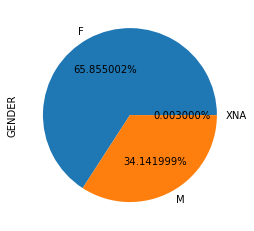

In [43]:
df['GENDER'].value_counts().plot(kind='pie',autopct='%.6f%%')

In [44]:
#65.85% clients are Females,34.14% clients are Males,0.003% of clients are XNA

In [46]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         90517
Revolving loans     9483
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

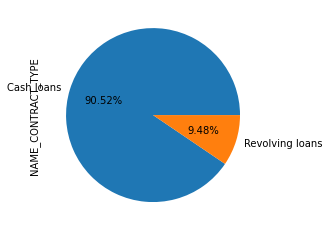

In [48]:
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [49]:
#90.52% loans are cash loans and 9.48% loans are revolving loans

In [50]:
df['Car'].value_counts()

N    66018
Y    33982
Name: Car, dtype: int64

<AxesSubplot:ylabel='Car'>

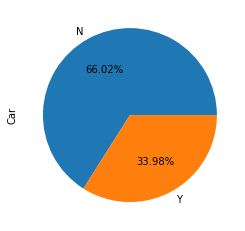

In [51]:
df['Car'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [52]:
#66% of clients dont have car and 33.9 %  have cars

In [55]:
df['House'].value_counts()

Y    69328
N    30672
Name: House, dtype: int64

<AxesSubplot:ylabel='House'>

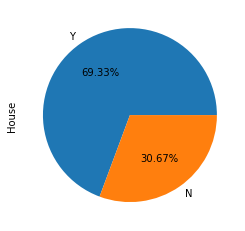

In [56]:
df['House'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [57]:
#69.3% client have houses and 30.67% of clients dont have houses

In [61]:
df.groupby('GENDER')['AMT_INCOME_TOTAL'].mean()

GENDER
F      157119.781612
M      193163.385545
XNA    166500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='GENDER', ylabel='AMT_INCOME_TOTAL'>

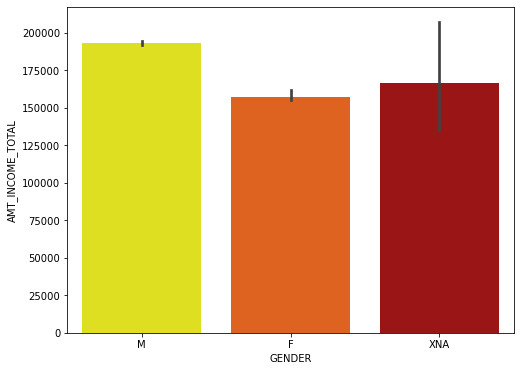

In [18]:
plt.figure(figsize=(8,6))
sb.barplot(data=df,x='GENDER',y='AMT_INCOME_TOTAL',estimator=np.mean,palette='hot_r')

In [7]:
a=df['AMT_INCOME_TOTAL'].mean()
df1=df[(df.AMT_INCOME_TOTAL<a)]
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0,180000.0,...,-491,1,1,1,1,0,Core staff,1.0,TUESDAY,0
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1


<AxesSubplot:xlabel='GENDER', ylabel='AMT_INCOME_TOTAL'>

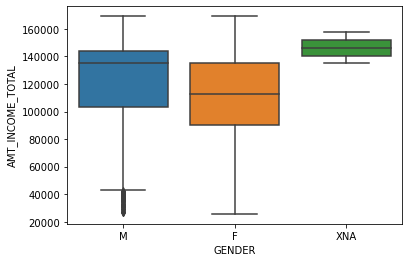

In [22]:

sb.boxplot(y = df1["AMT_INCOME_TOTAL"], x = df["GENDER"])

In [4]:
#from the box plot we can see that Male have a better spread of total income than females,so we can say that males have 
#income than females,those who have more income can have a chance to repay loan so we can say male clients have 
#better chance to repay loan than female clients

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_INCOME_TOTAL'>

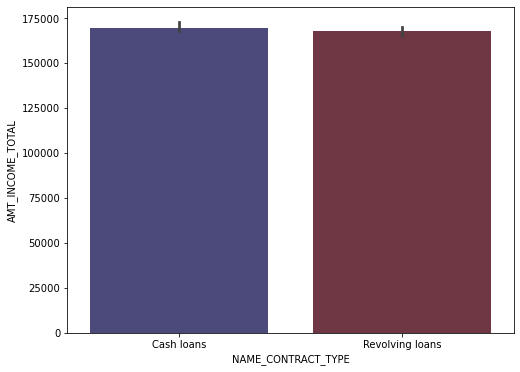

In [23]:
plt.figure(figsize=(8,6))
sb.barplot(data=df,x='NAME_CONTRACT_TYPE',y='AMT_INCOME_TOTAL',estimator=np.mean,palette='icefire')

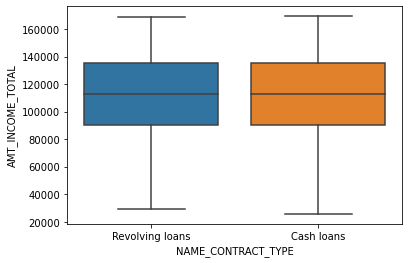

In [30]:
sb.boxplot(y = df1["AMT_INCOME_TOTAL"], x = df1["NAME_CONTRACT_TYPE"])
plt.savefig('save_as_a_png.pdf')

In [8]:
#from the box plot and barplot we can say that Cash Loans have a better spread of total amount than revolving Loans
#so we can say that those who have taken CashLoans have  better chances of repaying the Loan than those who have revolving loans

In [19]:
df1=df[(df.Car=='Y') & (df.House=='Y')]  
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,427500.0,...,-4286,1,1,0,1,0,Laborers,2.0,FRIDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,216067,0,Cash loans,M,Y,Y,0,180000.0,1002870.0,922500.0,...,365243,1,0,0,1,0,NaN,2.0,MONDAY,1
99984,216075,0,Cash loans,F,Y,Y,0,225000.0,513531.0,459000.0,...,-5127,1,1,0,1,0,Sales staff,1.0,FRIDAY,1
99985,216076,0,Cash loans,M,Y,Y,0,157500.0,445500.0,445500.0,...,-803,1,1,0,1,0,Drivers,2.0,SATURDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

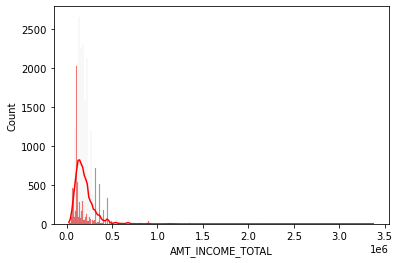

In [22]:
sb.histplot(data=df1['AMT_INCOME_TOTAL'],kde=True,color='red')

In [15]:
df2=df[(df.Car=='N') & (df.House=='N')]
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
16,100020,0,Cash loans,M,N,N,0,108000.0,509602.5,387000.0,...,-1317,1,1,0,1,0,Drivers,2.0,THURSDAY,1
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,450000.0,...,-4306,1,1,0,1,0,Sales staff,3.0,THURSDAY,1
32,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,180000.0,...,-4404,1,1,1,1,0,Laborers,2.0,SATURDAY,1
35,100041,0,Cash loans,F,N,N,0,112500.0,450000.0,450000.0,...,-1275,1,1,1,1,0,Sales staff,2.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,216058,0,Cash loans,F,N,N,0,171000.0,592560.0,450000.0,...,-1222,1,1,0,1,0,Accountants,1.0,SUNDAY,1
99973,216063,0,Cash loans,F,N,N,0,337500.0,728460.0,675000.0,...,-1375,1,1,1,1,0,NaN,2.0,FRIDAY,1
99987,216078,0,Cash loans,M,N,N,1,135000.0,640080.0,450000.0,...,-3468,1,1,0,1,0,NaN,2.0,FRIDAY,1
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

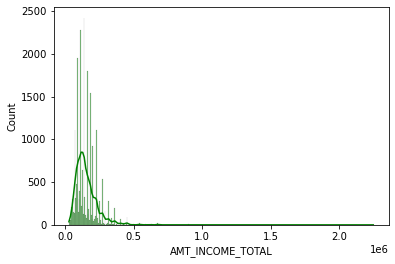

In [16]:
sb.histplot(data=df2['AMT_INCOME_TOTAL'],kde=True,color='green')

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

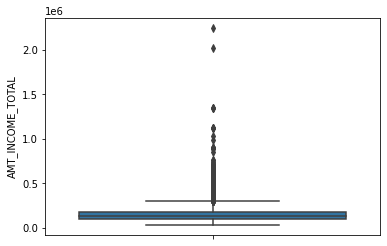

In [18]:

sb.boxplot(y = df2["AMT_INCOME_TOTAL"])

In [ ]:
#THE LEFT BOX PLOT IS FOR TOTAL INCOME OF THOSE CLIENTS WHO DONT HAVE CARS AND HOUSES AND THE RIGHT SIDE BOX PLOT IS FOR CLIENTS WHO HAVE CARS
#AND HOUSES

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

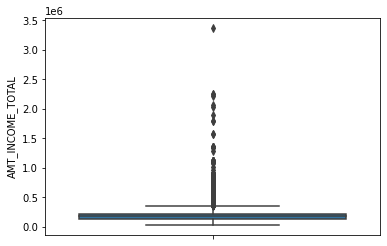

In [20]:
sb.boxplot(y = df1["AMT_INCOME_TOTAL"])

In [ ]:
#From the two histogram plots of total costs of clients with houses and cars and clients without houses and cars
#from this we can say that clients with houses and cars have better income than those who dont have houses and cars.
#so clients with houses and cars have more chances of repaying their loans than those who dont have houses and cars
#also those who have houses and cars the bank they can be better suited to give loans than those who dont have cars and houses
#thats because in that case bank can mortgadge their property temporarily if they dont keep onrepaying their loan

<AxesSubplot:ylabel='MOBILE_REACHABLE'>

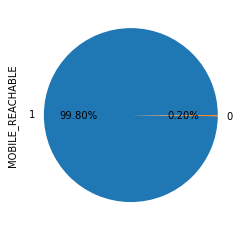

In [28]:
df['MOBILE_REACHABLE'].value_counts().plot(kind='pie',autopct='%.2f%%') 

In [29]:
#99.8% of clients are reachable through their mobile,and 0.2% arent rechable through thir mobile
#before approving the loan the bank must ensure that clients are reachable through their mobiles,as they can be contacted by
#the bank whenever the bank feels its needed

In [36]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


<AxesSubplot:ylabel='MOBILE'>

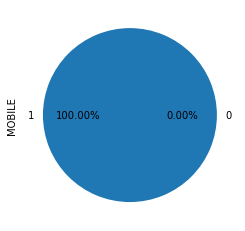

In [37]:
df['MOBILE'].value_counts().plot(kind='pie',autopct='%.2f%%') 

In [38]:
#all the clients have provided mobile phone
#bank shoud make sure that all clients have provided mobile phone

In [39]:
pd.crosstab(df.MOBILE,df.MOBILE_REACHABLE) 

MOBILE_REACHABLE,0,1
MOBILE,,
0,0,1
1,201,99798


<AxesSubplot:xlabel='MOBILE_REACHABLE', ylabel='count'>

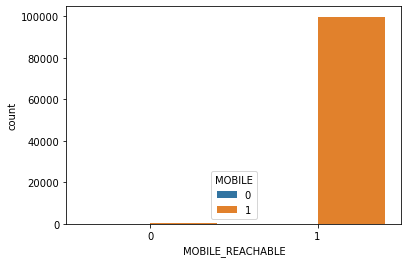

In [41]:
sb.countplot(x=df['MOBILE_REACHABLE'],hue=df['MOBILE'])

In [42]:
#except 1 client every client have provided their mobile numbers and have reachable mobile numbers
#bank should consider giving loan to those clients who have given mobile numbers and have a reachable mobile number

In [ ]:
df['MOBILE'].value_counts()

In [44]:
df['FLAG_EMAIL'].value_counts()

0    94381
1     5619
Name: FLAG_EMAIL, dtype: int64

<AxesSubplot:ylabel='FLAG_EMAIL'>

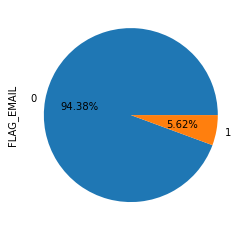

In [45]:
df['FLAG_EMAIL'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [46]:
#94.3% clients havent given email,5.62 % have given email

In [48]:
df['WORK_PHONE'].value_counts() 

1    82128
0    17872
Name: WORK_PHONE, dtype: int64

<AxesSubplot:ylabel='WORK_PHONE'>

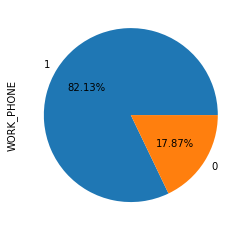

In [49]:
df['WORK_PHONE'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [50]:
#82.13% have given email phone and 17.87% havent given their email id to the bank

In [54]:
df['HOME_PHONE'].value_counts()

0    80026
1    19974
Name: HOME_PHONE, dtype: int64

<AxesSubplot:ylabel='HOME_PHONE'>

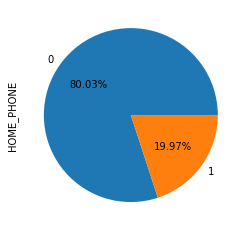

In [56]:
df['HOME_PHONE'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [ ]:
#80% of clients havent given home phone number and 20% have given home phone number

In [51]:
#While approving Loans the bank should make sure they have proper contact details of the client to contact them when they
#feel necessary,so lets check how many clients have given their mobile number, workplace number,email

In [57]:
#Since many customers havent given email as lot of people may not use that and home phone number so we should make sure we have
#their other contact details like workplace number,mobile number

In [60]:
df1=df[(df.WORK_PHONE==1) & (df.MOBILE==1) & (df.MOBILE_REACHABLE==1)]
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [70]:
a=df1['SK_ID_CURR'].count()
b=df['SK_ID_CURR'].count()
c=a/(a+b) 
d=c*100
d1=round(d,2)
print('percentage of clients have all the required contact details : ',d1)

percentage of clients have all the required contact details :  45.04


([<matplotlib.patches.Wedge at 0x1deda899040>,
 [Text(0.1708621715800078, 1.0866490318051014, 'All info available'),
  Text(-0.17086227331943182, -1.0866490158078257, 'All info not available')],
 [Text(0.09319754813454971, 0.5927176537118733, '45.04%'),
  Text(-0.09319760362878098, -0.5927176449860866, '54.96%')])

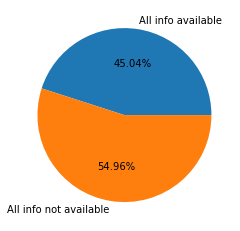

In [69]:
y=np.array([a,b])
x=['All info available','All info not available']
plt.pie(y,labels=x,autopct='%.2f%%')

In [66]:
#45% of the clients have all required and important contact details that should be consiered by the bank before approving loan
#the conditions are clients who have given mobile number,reachable mobile number and workplace number
#these three should definately be considered before approving loans

In [ ]:
#the bank should focus on giving loan to this 45% of the clients who have applied

In [71]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [74]:
df['AMT_CREDIT'].describe()


count    1.000000e+05
mean     5.990034e+05
std      4.020520e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.130405e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [18]:
a=df['AMT_CREDIT'].mean()
df1=df[(df.AMT_CREDIT>a)] 
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,-679,1,1,0,1,0,Core staff,3.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,216079,0,Cash loans,M,N,Y,2,135000.0,974794.5,841500.0,...,-315,1,1,0,1,0,Laborers,4.0,FRIDAY,1
99989,216080,0,Cash loans,F,N,Y,0,180000.0,1546020.0,1350000.0,...,-2250,1,1,0,1,0,Laborers,2.0,MONDAY,1
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,-135,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1


In [80]:
a1=df1['SK_ID_CURR'].count()
b1=df['SK_ID_CURR'].count()
c=a1/(a1+b1)
d=c*100
d1=round(d,2)
print('percentage of clients having credit limit > mean credit limit : ',d1)

percentage of clients having credit limit > mean credit limit :  28.8


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

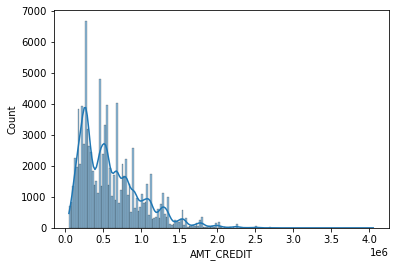

In [82]:
sb.histplot(data=df['AMT_CREDIT'],kde=True)

In [83]:
#credit limit means total amount of credit available to a borrower,so those who have high credit limit should get
#higher chances of their loan being approved by the bank,28.8% of cients have credit limit higher than mean credit limit,
#bank should focus on giving loans to these clients

([<matplotlib.patches.Wedge at 0x1dedac40c10>,
 [Text(0.6796378340372181, 0.8649233576133778, 'high credit limit'),
  Text(-0.6796378340372183, -0.8649233576133776, 'low credit limit')],
 [Text(0.37071154583848254, 0.4717763768800242, '28.80%'),
  Text(-0.3707115458384827, -0.47177637688002405, '71.20%')])

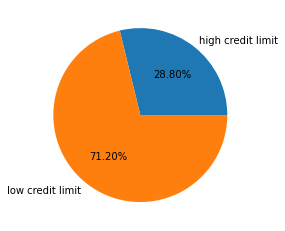

In [84]:
y=np.array([a1,b1])
x=['high credit limit','low credit limit']
plt.pie(y,labels=x,autopct='%.2f%%')

<AxesSubplot:>

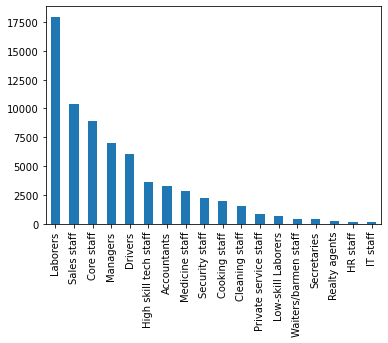

In [6]:
df['OCCUPATION_TYPE'].value_counts().plot.bar()

<AxesSubplot:ylabel='OCCUPATION_TYPE'>

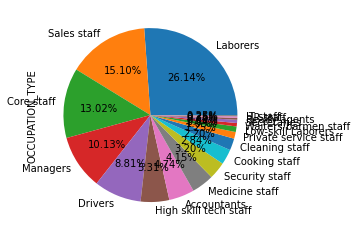

In [88]:
df['OCCUPATION_TYPE'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [92]:
a=pd.pivot_table(df,index='OCCUPATION_TYPE',values='AMT_INCOME_TOTAL',aggfunc='mean')
a.sort_values(by='AMT_INCOME_TOTAL',ascending=False)

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
Managers,265472.439537
IT staff,204512.591716
Accountants,192833.988950
Realty agents,191556.818182
Drivers,186656.907875
High skill tech staff,183203.103021
HR staff,178856.229282
Private service staff,178058.601970
Core staff,171825.151609


[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Drivers'),
 Text(3, 0, 'Cleaning staff'),
 Text(4, 0, 'Cooking staff'),
 Text(5, 0, 'Private service staff'),
 Text(6, 0, 'Sales staff'),
 Text(7, 0, 'Medicine staff'),
 Text(8, 0, 'Managers'),
 Text(9, 0, 'Security staff'),
 Text(10, 0, 'Waiters/barmen staff'),
 Text(11, 0, 'Low-skill Laborers'),
 Text(12, 0, 'High skill tech staff'),
 Text(13, 0, 'Accountants'),
 Text(14, 0, 'Secretaries'),
 Text(15, 0, 'Realty agents'),
 Text(16, 0, 'HR staff'),
 Text(17, 0, 'IT staff')]

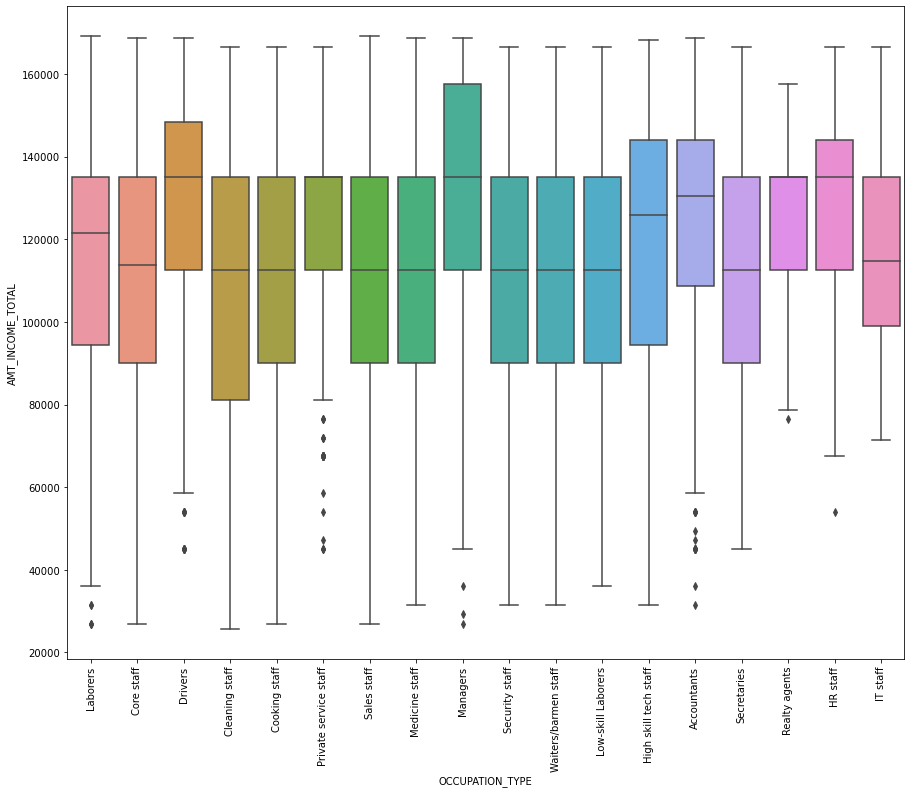

In [11]:

plt.figure(figsize=(15,12))
a=sb.boxplot(y = df1["AMT_INCOME_TOTAL"], x = df1["OCCUPATION_TYPE"])
a.set_xticklabels(a.get_xticklabels(),rotation=90) 

In [7]:
#from the boxplot we can see the spread of total amount is best for it staff,HRstaff,Manager ,accountants
#from this we can say that people from these occupations should be have more chances of loans  getting approved
#tan those coming from other occupations

<AxesSubplot:>

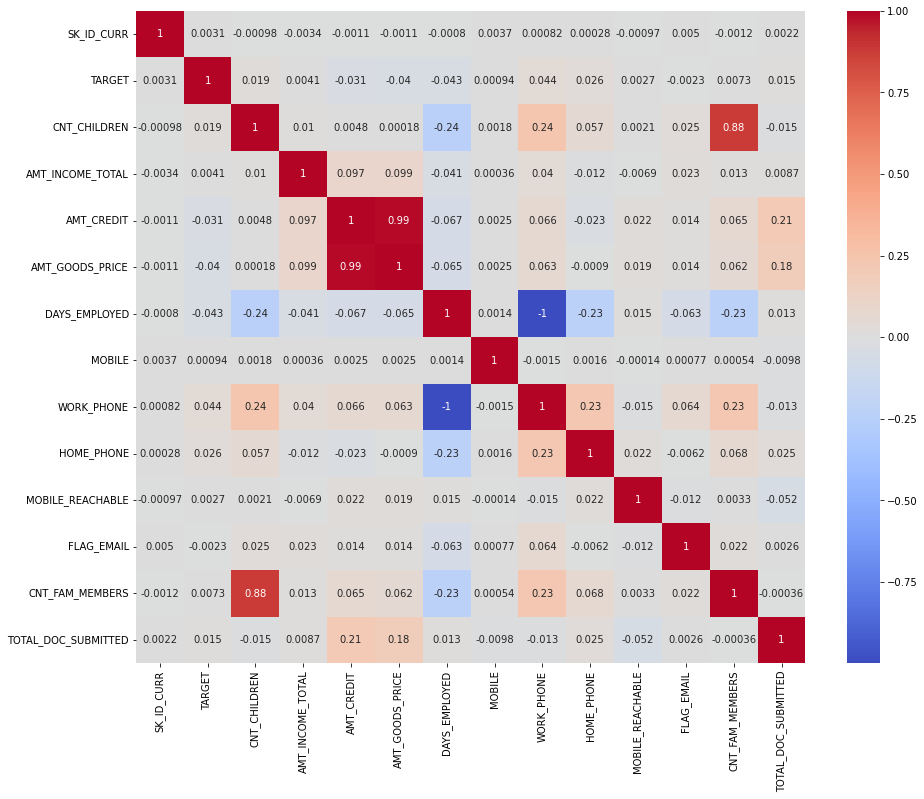

In [13]:
plt.figure(figsize=(15,12))
corr_df=df.corr()
sb.heatmap(corr_df,cmap='coolwarm',annot=True)

In [15]:
df['CNT_FAM_MEMBERS'].corr(df['AMT_INCOME_TOTAL'])

0.01275837408701086

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='CNT_FAM_MEMBERS'>

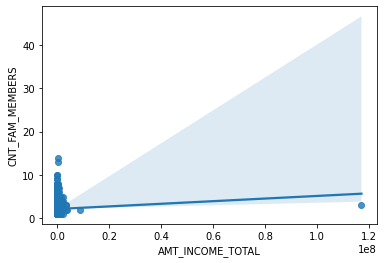

In [15]:
sb.regplot(x='AMT_INCOME_TOTAL',y='CNT_FAM_MEMBERS',data=df)

In [17]:
#from this regression plot we cn say that clients with higher number of children can have more income so they
#may have a chnce of getting loan approved by the bank

In [12]:
x=df1['AMT_INCOME_TOTAL']
y=df1['CNT_FAM_MEMBERS']

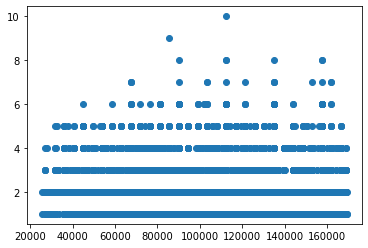

In [13]:
plt.scatter(x,y)

In [16]:
df['AMT_CREDIT'].corr(df['AMT_INCOME_TOTAL'])

0.09709501151652845

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

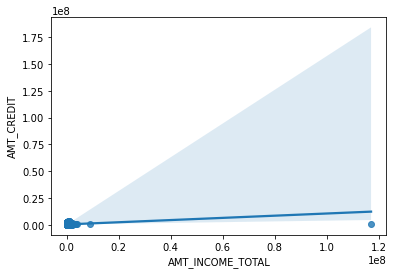

In [21]:
sb.regplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=df)

In [19]:
x=df1['AMT_INCOME_TOTAL']
y=df1['CNT_FAM_MEMBERS']

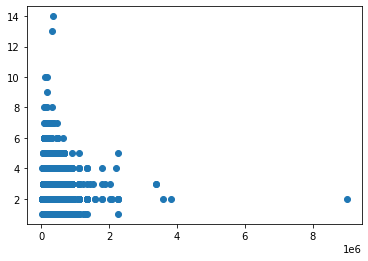

In [20]:
plt.scatter(x,y)

[]

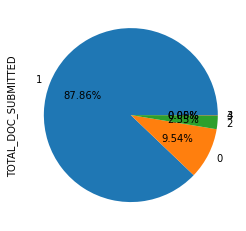

In [9]:
a=df['TOTAL_DOC_SUBMITTED'].value_counts().plot(kind='pie',autopct='%.2f%%')
a.set_xticklabels(a.get_xticklabels(),rotation=45) 

<AxesSubplot:>

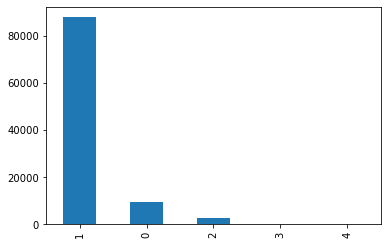

In [10]:
df['TOTAL_DOC_SUBMITTED'].value_counts().plot.bar()

In [11]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


<AxesSubplot:xlabel='TOTAL_DOC_SUBMITTED', ylabel='count'>

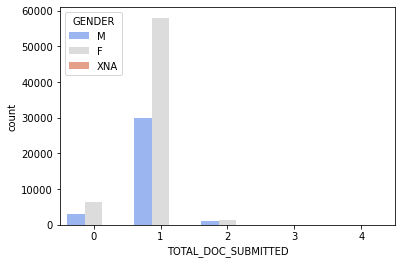

In [14]:
sb.countplot(x=df['TOTAL_DOC_SUBMITTED'],hue=df['GENDER'],palette='coolwarm')